In [1]:
import jax
import jax.numpy as jnp
import sklearn
from sklearn import datasets

In [2]:
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/Users/ersi/Documents/ott/')

In [3]:
from ott.core import bar_problems, continuous_barycenter

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Set problem size
n_max = 20
dim = 2
N = 3
n = [jax.random.randint(jax.random.PRNGKey(x),
                        shape=(1,), minval=20, maxval=n_max) for x in range(N)]
n = jnp.concatenate(n)

In [6]:
n

DeviceArray([20, 20, 20], dtype=int32)

In [7]:
seed = 42 # added seed for reproducible data
data = sklearn.datasets.make_blobs(n_samples=n, n_features=dim, 
                                centers=None, shuffle=False, random_state=seed)
y = jnp.array(data[0])
labels = jnp.array(data[1])

In [8]:
bar_p = bar_problems.BarycenterProblem(
      y, num_per_segment=n, num_segments=N, max_measure_size=n_max,
      epsilon=0.01)

In [9]:
solver = continuous_barycenter.WassersteinBarycenter()

In [10]:
bar_size=10
out = solver(bar_p, bar_size=bar_size)

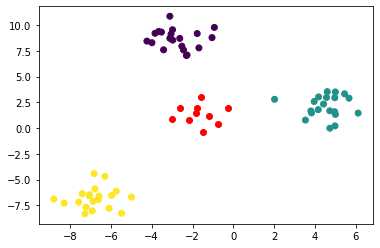

In [11]:
plt.figure();
plt.scatter(y[:,0], y[:,1], c=labels);
plt.scatter(out.x[:,0], out.x[:,1], c='red');

In [12]:
y

DeviceArray([[-0.9299848 ,  9.781721  ],
             [-2.978672  ,  9.556847  ],
             [-2.9726152 ,  8.548556  ],
             [-2.2672353 ,  7.101006  ],
             [-4.2341156 ,  8.451999  ],
             [-3.5220287 ,  9.328533  ],
             [-3.4172218 ,  7.6019826 ],
             [-1.0435488 ,  8.788509  ],
             [-2.4416695 ,  7.589538  ],
             [-3.0535803 ,  9.125209  ],
             [-3.6601913 ,  9.389984  ],
             [-3.1098363 ,  8.722592  ],
             [-3.1109042 , 10.866565  ],
             [-2.5226948 ,  7.9565754 ],
             [-1.6866527 ,  7.7934422 ],
             [-2.300334  ,  7.054616  ],
             [-3.8373837 ,  9.211147  ],
             [-1.7707311 ,  9.185655  ],
             [-2.624846  ,  8.713182  ],
             [-3.9877195 ,  8.294442  ],
             [ 4.17924   ,  3.0302918 ],
             [ 4.983497  ,  0.21012953],
             [ 4.963963  ,  1.5880874 ],
             [ 3.962957  ,  2.584846  ],
             [ 5